In [128]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from api_credentials import client_id, client_secret
from functions import fetch_and_display_playlist_info, load_data_and_create_df
import json

# Load playlists from JSON file
with open('playlists.json', 'r') as file:
    playlists_dict = json.load(file)

# Initialise the Spotify client with client credentials for public data access
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

import logging
# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')


In [129]:
# New Music Friday AU & NZ playlist 
playlist_id = '37i9dQZF1DWT2SPAYawYcO'

**TL;DR:** Extract all songs in the New Music Friday AU & NZ playlist. Then using all those unique track_id's, find which other playlists (from `playlists.json`) contain that track_id and what position it is in.

**Fetches and Displays Information About Tracks in a Specific Playlist and Their Positions in Various Playlists**

This function executes multiple steps to collect and display data:

1. **Fetch Playlist Tracks:** Utilizes `fetch_playlist_tracks` to retrieve track IDs, artist names, track names, and followers count for a given playlist ID. This involves Spotify API communication to return relevant data.

2. **Get Track Positions in Playlists:** With `get_tracks_positions_in_playlists`, it fetches tracks' positions across playlists defined in `playlists_dict`. This step queries Spotify API for each track's presence and position in these playlists.

3. **Prepare Data for DataFrame Creation:**
    - Prepares data by creating a list of dictionaries, each representing a track with its artist name, track title, and positions in playlists. Tracks not appearing in some playlists receive empty strings as values.
    - For each track in `track_positions`, initializes a new row with empty strings for each playlist, adds the artist's name and track title, and includes the track's position(s) in playlists. Positions are adjusted for zero-based indexing (`pos + 1`) and combined into a single comma-separated string.

4. **Convert List of Dictionaries to DataFrame:** Converts the prepared data into a pandas DataFrame, structured with 'Artist' and 'Track' followed by each playlist column. This DataFrame is designed for tabular display of each track's position across the specified playlists.

**Parameters:**

- `sp`: Spotify client instance for Spotify API communication.
- `playlists_dict`: Maps playlist names to Spotify IDs, identifying playlists for position checks.
- `playlist_id`: Spotify ID for the playlist being queried.

**Returns:**

- `df`: pandas DataFrame with track information and positions across playlists.


In [130]:
df = fetch_and_display_playlist_info(sp, playlists_dict, playlist_id)
df.head()

2024-02-19 20:09:36,960 - INFO - Fetching playlist: 37i9dQZF1DWT2SPAYawYcO
2024-02-19 20:09:38,271 - INFO - Fetched 84 items, increasing offset to 84.


,Artist,Track,Top 50 Australia,New Music Friday AU & NZ,Hot Hits Australia,Front Left,A1,Dance Generation,Get Popped!,R&B Connect,...,Breaking Hits,Chilled Hits,Vibe Check,crush,the hybrid,Just Chill,Morning Motivation,Lazy Sunday,Today's Top Hits,Singled Out
0,Beyoncé,TEXAS HOLD 'EM,NaN,1,10,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,1
1,Dua Lipa,Training Season,41,2,3,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,Royel Otis,Foam,NaN,3,NaN,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"KUČKA, Flume",One More Night,NaN,4,NaN,NaN,NaN,19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Cosmo's Midnight, Franc Moody",Fantasy (feat. Franc Moody),NaN,5,NaN,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
kobe_df = df[df['Artist'] == 'Forest Claudette']
kobe_df = kobe_df.dropna(axis=1, how='any')
kobe_df

,Artist,Track,New Music Friday AU & NZ,Indie Arrivals
10,Forest Claudette,Kobe Beef,11,12


### Store total adds in a dictionary. Playlist Name as keys, number of new songs added to that playlist as the values

In [132]:
columns = df.columns[2:]
adds_dict = {}

for column in columns:
    adds_number = len(df[columns]) - df[column].isna().sum()
    adds_dict[column] = adds_number
    
    
# Sort the dictionary by values
sorted_adds_dict = dict(sorted(adds_dict.items(), key=lambda item: item[1], reverse=False))

sorted_adds_dict


{'Get Popped!': 0,
 'POP EDGE': 0,
 'come thru': 0,
 'Chilled Hits': 0,
 'Vibe Check': 0,
 'crush': 0,
 'Just Chill': 0,
 'Morning Motivation': 0,
 'Lazy Sunday': 0,
 'Top 50 Australia': 1,
 'the hybrid': 1,
 'Singled Out': 1,
 'Hot Hits Australia': 2,
 'The Flavour': 2,
 'R&B Feels': 2,
 "Today's Top Hits": 2,
 "Beats n' Bars": 3,
 'Rock Out.': 3,
 'Breaking Hits': 3,
 'A1': 4,
 'Fresh Country': 4,
 'Mellow Styles': 4,
 'R&B Connect': 5,
 "triple j's New Music Hitlist": 5,
 'Alt Here': 6,
 'Dance Generation': 7,
 'Front Left': 10,
 "Pop n' Fresh": 11,
 'New Dance Beats': 12,
 'The Drip': 12,
 'Indie Arrivals': 21,
 'New Music Friday AU & NZ': 84}

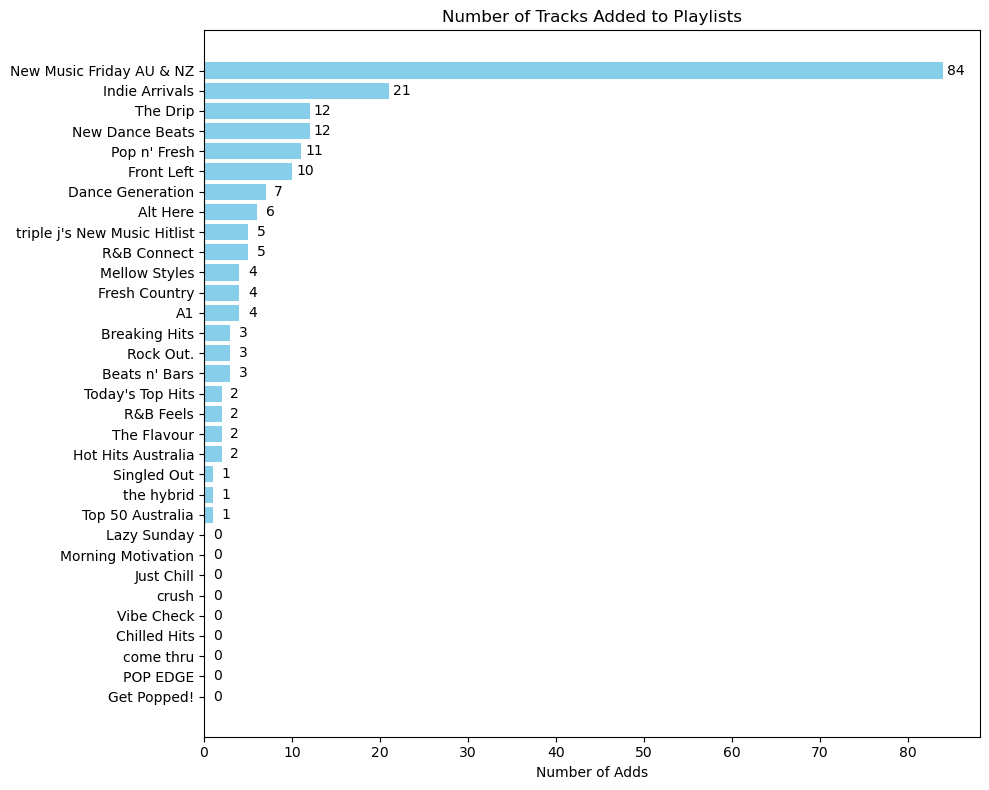

In [133]:
playlists = list(sorted_adds_dict.keys())
adds = list(sorted_adds_dict.values())

plt.figure(figsize=(10, 8))

# Enhanced Bar Chart with additional styling
bars = plt.barh(playlists, adds, color='skyblue')
plt.xlabel('Number of Adds')
plt.title('Number of Tracks Added to Playlists')

# Adding value labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1.5, bar.get_y() + bar.get_height()/2, 
             f'{width}', ha='center', va='center')

plt.tight_layout()
plt.show()


## Calculate Playlist Adds by Artist

In [134]:
# Function to loop through each row and calculate non-null values from index 2 onwards
def calculate_non_nulls(df):
    results = []
    for index, row in df.iterrows():
        non_null_count = row[2:].notnull().sum()
        results.append((row['Artist'], row['Track'], non_null_count))
    return pd.DataFrame(results, columns=['Artist', 'Track', 'AU Playlist Adds'])

# Calculate and view results
adds_by_artist = calculate_non_nulls(df)
adds_by_artist = adds_by_artist.sort_values(by='AU Playlist Adds', ascending=False)
adds_by_artist.reset_index(drop=True, inplace=True)
adds_by_artist


,Artist,Track,AU Playlist Adds
0,Beyoncé,TEXAS HOLD 'EM,8
1,Dua Lipa,Training Season,7
2,IDLES,POP POP POP,5
3,"IAMDDB, Masego",RASTA PASTA (ft. Masego),5
4,Warpaint,Common Blue,4
...,...,...,...
79,Niall Horan,You Could Start A Cult - Live from Spotify Stu...,1
80,"Flo Rida, Brian Kelley",Feels Right (I Love It),1
81,"John Summit, Hayla",Shiver,1
82,Muroki,Bad Dreams,1


In [135]:
most_added_artist = adds_by_artist.iloc[0]
print("Most Added Artist:")
most_added_artist

Most Added Artist:


Artist                     Beyoncé
Track               TEXAS HOLD 'EM
AU Playlist Adds                 8
Name: 0, dtype: object

In [136]:
df_2 = load_data_and_create_df(sp, playlists_dict, playlist_id)

2024-02-19 20:10:36,180 - INFO - Fetching playlist: 37i9dQZF1DWT2SPAYawYcO


Loading data...


2024-02-19 20:10:37,117 - INFO - Fetched 84 items, increasing offset to 84.


ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [ ]:
# Increase position by +1 to account for 0 index
df_2['Position'] = df_2['Position'].astype(int) + 1
df_2.head()

,Artist,Title,Playlist,Position,Followers
0,Beyoncé,TEXAS HOLD 'EM,New Music Friday AU & NZ,1,370394
1,Beyoncé,TEXAS HOLD 'EM,Hot Hits Australia,10,1400328
2,Beyoncé,TEXAS HOLD 'EM,triple j's New Music Hitlist,2,310295
3,Beyoncé,TEXAS HOLD 'EM,Fresh Country,1,378816
4,Beyoncé,TEXAS HOLD 'EM,Pop n' Fresh,4,120571


## Finding total follower count for each artist

In [ ]:
total_follower_count = df_2.groupby('Artist')['Followers'].sum().reset_index(name='Total Followers')

total_follower_count = total_follower_count.sort_values(by='Total Followers', ascending=False)

print(total_follower_count.to_string(index=False))


                                    Artist  Total Followers
                                   Beyoncé         37941495
                                  Dua Lipa         37516962
                            IAMDDB, Masego          1321167
                                Royel Otis          1315703
             Cosmo's Midnight, Franc Moody          1145082
                                     IDLES          1143234
                         Caroline Polachek          1053085
                     Full Flower Moon Band          1053085
                           Vampire Weekend          1053085
                                  Warpaint          1053085
             Calvin Harris, Rag'n'Bone Man          1041604
  Kitty Ca$h, Thundercat, James Fauntleroy          1005408
                             Fay Wildhagen          1005408
                              KUČKA, Flume           991667
                         Gryffin, Rita Ora           921033
                        MEDUZA, Varun Ja

### Troubleshooting incorrect positions being returned. 

In [140]:
track_id = "2wVV5aH5WMrQ797czLe0lU"
playlist_id = "7vFQNWXoblEJXpbnTuyz76"

def find_track_position(sp, playlist_id, track_id):
    offset = 0
    while True:
        # Retrieve a page of tracks in the playlist
        results = sp.playlist_items(playlist_id,
                                    offset=offset,
                                    fields='items.track.id,total')
        # Check if we've reached the end of the playlist
        if not results['items']:
            break
        # Iterate through the current page of tracks
        for i, item in enumerate(results['items']):
            current_track_id = item['track']['id']
            if current_track_id == track_id:
                # Return the position corrected for 1-indexing
                return offset + i + 1  # Correcting for 1-indexing
        # Move to the next page
        offset += len(results['items'])
    # If the track is not found after searching the entire playlist
    return None

# Find the track position
position = find_track_position(sp, playlist_id, track_id)

if position is not None:
    print(f"Track found at position: {position}")
else:
    print("Track not found in the playlist.")



Track found at position: 4


In [141]:
playlist_id = '7vFQNWXoblEJXpbnTuyz76'

def get_playlist_tracks(sp, playlist_id):
    tracks = []
    results = sp.playlist_items(playlist_id)
    tracks.extend(results['items'])
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

tracks = get_playlist_tracks(sp, playlist_id)

# Print out the names of the tracks in the playlist
for i, item in enumerate(tracks):
    track = item['track']
    print(f"{i+1}: {track['name']} by {' , '.join(artist['name'] for artist in track['artists'])}")

1: Foam by Royel Otis
2: TEXAS HOLD 'EM by Beyoncé
3: One More Night by KUČKA , Flume
4: Kobe Beef by Forest Claudette
5: WARZ0NE by Stand Atlantic
6: Let It Out by Noah Dillon
7: Bandit by Don Toliver
8: Bass Keeps Calling by Becca Hatch
9: Training Season by Dua Lipa
10: Middle Of The Night by Thomas Headon
11: just a gimmick by Ūla
12: Suddenly Okay by Blake Rose
13: Mood Swings by Little Simz
14: LiGhT rAiLs *ੈ✩‧₊˚ by 1999 WRITE THE FUTURE , Rick Ross , Rich Brian
15: Too Much by girl in red
16: Best Friend by Great Gable
17: Sleezy Steezy Cool (feat. Tia Gostelow) by 3% , Tia Gostelow
18: RIDE by Mia Rodriguez
19: Somebody (2024) by Gotye , FISHER , Chris Lake , Kimbra , Sante Sansone
20: Don't Forget Me by Maggie Rogers
21: Leave Her by d4vd
22: Lean In by The Good Kids
23: Teardrop by Telenova
24: Cacao and Cocaine by SOFIA ISELLA
25: undrcut by Juno Mamba
26: Bitter by Chloe Parché
27: The Feminine Urge by The Last Dinner Party
28: All Night (feat. LAUREL) by Kita Alexander , L